<a href="https://colab.research.google.com/github/2k0v11/WebScrapping/blob/main/Amazon_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
#bs4 is a package and BeautifulSoup is a Library


In [ ]:
url='https://www.amazon.in/Samsung-Galaxy-Ultra-Phantom-Storage/product-reviews/B0BT9FDZ8N/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
page=requests.get(url) #the requests library is requesting for the url to be fethed
page                   #response[200]-all okay,response[503]-check for proper url

<Response [200]>

In [ ]:
page.content

In [ ]:
soup= bs(page.content,'html.parser')
soup #soup variable has the full source code of the webpage
     #html.parser - displays our code in a better readable format


In [ ]:
names=soup.find_all('span',class_ ='a-profile-name')[2:]
names
#Removed the top-positive and top-critical review

[<span class="a-profile-name">Aditya Sharma</span>,
 <span class="a-profile-name">Aditya Sharma</span>,
 <span class="a-profile-name">Shahzad Zaman</span>,
 <span class="a-profile-name">@jkmp3</span>,
 <span class="a-profile-name">@jkmp3</span>,
 <span class="a-profile-name">saiful</span>,
 <span class="a-profile-name">Yogendra S.</span>,
 <span class="a-profile-name">Singh</span>,
 <span class="a-profile-name">Singh</span>,
 <span class="a-profile-name">Rohan</span>,
 <span class="a-profile-name">Arunvignesh s/o Mani</span>,
 <span class="a-profile-name">Arunvignesh s/o Mani</span>,
 <span class="a-profile-name">MarB</span>,
 <span class="a-profile-name">Hasu t.</span>]

In [ ]:
import pandas as pd
df=pd.DataFrame(names,columns= ['Customer name'])
df

,Customer name
0,Aditya Sharma
1,Aditya Sharma
2,Shahzad Zaman
3,@jkmp3
4,@jkmp3
5,saiful
6,Yogendra S.
7,Singh
8,Singh
9,Rohan


In [ ]:
df=df.drop_duplicates(ignore_index=True)
df

,Customer name
0,Aditya Sharma
1,Shahzad Zaman
2,@jkmp3
3,saiful
4,Yogendra S.
5,Singh
6,Rohan
7,Arunvignesh s/o Mani
8,MarB
9,Hasu t.


In [ ]:
r_title=soup.find_all('a',class_='review-title')
r_title

[<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R2QZSLVWHDNM4J?ASIN=B0BT9FDZ8N"><i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i><span class="a-letter-space"></span>
 <span>The best smartphone money can buy!</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R2M811HPC4BDB9?ASIN=B0BT9FDZ8N"><i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">4.0 out of 5 stars</span></i><span class="a-letter-space"></span>
 <span>A premium phone but...</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R2008B0FPXTBQM?ASIN=B0BT9FDZ8N"><i clas

In [ ]:
len(r_title)

10

In [ ]:
review_title=[]
for i in range(0,len(r_title)):
 review_title.append(r_title[i].get_text().replace(".0 out of 5 stars",'')[2:-1]) #[2:-1] is done to remove the '\n' at the begining and end of each review in html text
review_title

['The best smartphone money can buy!',
 'A premium phone but...',
 'Satisfied with the purchase',
 'Good phone for compact size users',
 'Awesome Phone',
 'The perfect beast',
 'Great Product - Top Tier in all Products',
 'After 1 month of this review,',
 "It's ok",
 'S23 8/256']

In [ ]:
date=soup.find_all('span',class_='review-date')[2:]
date

[<span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India 🇮🇳 on 7 May 2023</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India 🇮🇳 on 3 July 2023</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India 🇮🇳 on 29 May 2023</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India 🇮🇳 on 4 July 2023</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India 🇮🇳 on 10 July 2023</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India 🇮🇳 on 28 February 2023</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India 🇮🇳 on 2 July 2023</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India 🇮🇳 on 30 April 2023</

In [ ]:
review_date=[]
for i in range(0,len(date)):
  review_date.append(date[i].get_text().replace("Reviewed in India 🇮🇳 on ",''))
review_date

['7 May 2023',
 '3 July 2023',
 '29 May 2023',
 '4 July 2023',
 '10 July 2023',
 '28 February 2023',
 '2 July 2023',
 '30 April 2023',
 '3 July 2023',
 '26 June 2023']

In [ ]:
r_rating=soup.find_all('i',class_='review-rating')[2:]
r_rating

[<i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">4.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">4.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">4.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">4.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-

In [ ]:
review_rating=[]
for i in range(0,len(r_rating)):
  review_rating.append(r_rating[i].get_text())
review_rating

['5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '4.0 out of 5 stars',
 '4.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars']

In [ ]:
len(review_rating)

10

In [ ]:
r_content=soup.find_all('span',class_='review-text-content')
r_content

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>After using Samsung Galaxy S23 Ultra for quite a bit as a daily driver and coming back to Samsung after a long time after using other smaller form factor phones like ONEPLUS 9, here's what I think about this phone.<br/><br/>PROS:<br/><br/>- This phone has the best camera ever installed into a smartphone, hands-down! No other phone made in human history can ever come close to 1% of what Samsung Galaxy S23 Ultra's cameras can do.<br/><br/>- Performance is crazy! Not only it has Snapdragon 8Gen-2, but that too custom-made for Samsung Galaxy phones. You can play any games, run any apps and do whatever you'd want from a phone that is used at work, gaming, taking photos/videos and for personal use at the same time.<br/><br/>- Rectangular form factor of this phone makes it so much comfortable and easy to hold. And it looks very premium too, which obviously is expected from a phone that costs this much.<

In [ ]:
review_content=[]
for i in range(0,len(r_content)):
  review_content.append(r_content[i].get_text().replace('\n',''))
review_content

['After using Samsung Galaxy S23 Ultra for quite a bit as a daily driver and coming back to Samsung after a long time after using other smaller form factor phones like ONEPLUS 9, here\'s what I think about this phone.PROS:- This phone has the best camera ever installed into a smartphone, hands-down! No other phone made in human history can ever come close to 1% of what Samsung Galaxy S23 Ultra\'s cameras can do.- Performance is crazy! Not only it has Snapdragon 8Gen-2, but that too custom-made for Samsung Galaxy phones. You can play any games, run any apps and do whatever you\'d want from a phone that is used at work, gaming, taking photos/videos and for personal use at the same time.- Rectangular form factor of this phone makes it so much comfortable and easy to hold. And it looks very premium too, which obviously is expected from a phone that costs this much.- OneUI has so many great features that they cannot be listed in one place. It brings a whole new meaning to "smart" in smartph

In [ ]:
len(review_content)

10

In [ ]:
df['Review Title']=review_title
df['Review Date']= review_date
df['Review Rating']=review_rating
df['Review Content']=review_content

<ipython-input-83-6c9f1fbf7802>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Title']=review_title
<ipython-input-83-6c9f1fbf7802>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Date']= review_date
<ipython-input-83-6c9f1fbf7802>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [ ]:
df

,Customer name,Review Title,Review Date,Review Rating,Review Content
0,Aditya Sharma,The best smartphone money can buy!,7 May 2023,5.0 out of 5 stars,After using Samsung Galaxy S23 Ultra for quite...
1,Shahzad Zaman,A premium phone but...,3 July 2023,4.0 out of 5 stars,Every review that you have seen about this pho...
2,@jkmp3,Satisfied with the purchase,29 May 2023,4.0 out of 5 stars,"Bought 256GB variant for ₹73,500. Got same day..."
3,saiful,Good phone for compact size users,4 July 2023,4.0 out of 5 stars,All are good.I m not satisfied with front came...
4,Yogendra S.,Awesome Phone,10 July 2023,4.0 out of 5 stars,"I loved it. Before this Phone, I was using Sam..."
5,Singh,The perfect beast,28 February 2023,5.0 out of 5 stars,This phone is a pefect upgrade from my old One...
6,Rohan,Great Product - Top Tier in all Products,2 July 2023,5.0 out of 5 stars,I got this phone just before making an interna...
7,Arunvignesh s/o Mani,"After 1 month of this review,",30 April 2023,4.0 out of 5 stars,"Mine 8gb,256gb varient purchase after 1 month ..."
8,MarB,It's ok,3 July 2023,4.0 out of 5 stars,Photocamera is excellent. Storage space is exc...
9,Hasu t.,S23 8/256,26 June 2023,5.0 out of 5 stars,I would say its the best ever compact flagship...


In [ ]:
import csv
df.to_csv('Amazon_reviews.csv',index=False)


In [ ]:
import pandas as pd
df1=pd.read_csv('/content/Amazon_reviews.csv')
df1

,Customer name,Review Title,Review Date,Review Rating,Review Content
0,Aditya Sharma,The best smartphone money can buy!,7 May 2023,5.0 out of 5 stars,After using Samsung Galaxy S23 Ultra for quite...
1,Shahzad Zaman,A premium phone but...,3 July 2023,4.0 out of 5 stars,Every review that you have seen about this pho...
2,@jkmp3,Satisfied with the purchase,29 May 2023,4.0 out of 5 stars,"Bought 256GB variant for ₹73,500. Got same day..."
3,saiful,Good phone for compact size users,4 July 2023,4.0 out of 5 stars,All are good.I m not satisfied with front came...
4,Yogendra S.,Awesome Phone,10 July 2023,4.0 out of 5 stars,"I loved it. Before this Phone, I was using Sam..."
5,Singh,The perfect beast,28 February 2023,5.0 out of 5 stars,This phone is a pefect upgrade from my old One...
6,Rohan,Great Product - Top Tier in all Products,2 July 2023,5.0 out of 5 stars,I got this phone just before making an interna...
7,Arunvignesh s/o Mani,"After 1 month of this review,",30 April 2023,4.0 out of 5 stars,"Mine 8gb,256gb varient purchase after 1 month ..."
8,MarB,It's ok,3 July 2023,4.0 out of 5 stars,Photocamera is excellent. Storage space is exc...
9,Hasu t.,S23 8/256,26 June 2023,5.0 out of 5 stars,I would say its the best ever compact flagship...


In [ ]:
import matplotlib.pyplot as plt
rating_counts=df1['Review Rating'].value_counts()
rating_counts


4.0 out of 5 stars    6
5.0 out of 5 stars    4
Name: Review Rating, dtype: int64

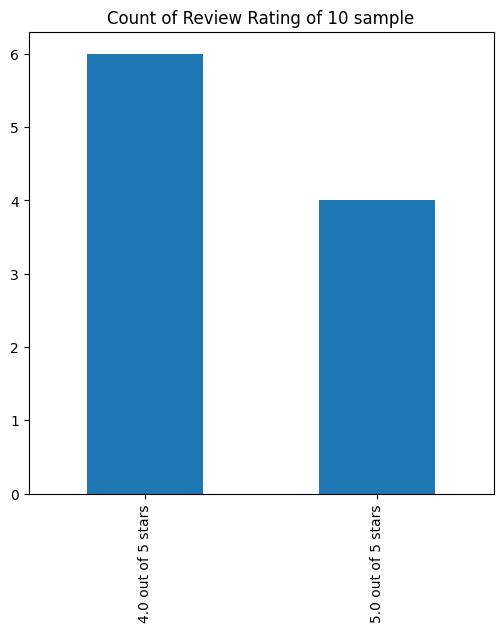

In [ ]:
plt.figure(figsize=(6,6))
rating_counts.plot(kind='bar')
plt.title('Count of Review Rating of 10 sample')
plt.show()